# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import matplotlib 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
zillow = pd.read_csv('zillow_data.csv')

In [3]:
zillow.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
get_datetimes(zillow).shape

(265,)

# Step 3: Reshape from Wide to Long Format

In [6]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted
#     return melted.groupby('time').aggregate({'value':'mean'})

In [7]:
def convert_date_index(df):
    pd.to_datetime(df['time'])

In [8]:
df = melt_data(zillow)

In [9]:
df_2k10 = df[df['time']>='2010-06']

In [10]:
df_2k10.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
2502910,60657,Chicago,IL,Chicago,Cook,84654,1,2010-06-01,766100.0
2502911,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,2010-06-01,203300.0
2502912,77494,Katy,TX,Houston,Harris,91982,3,2010-06-01,251200.0
2502913,60614,Chicago,IL,Chicago,Cook,84616,4,2010-06-01,973700.0
2502914,79936,El Paso,TX,El Paso,El Paso,93144,5,2010-06-01,116100.0


# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)
size = (8,4)
size2 = (4,2)

In [12]:
time_df = df_2k10.groupby('time').aggregate({'value':'mean'})
zip_df = df_2k10.groupby('RegionName').aggregate({'value':'mean'})

In [13]:
#transform df with log
lg_time_df = np.log(time_df)
lg_time_df.head()

,value
time,
2010-06-01,12.279309
2010-07-01,12.275519
2010-08-01,12.271434
2010-09-01,12.266580
2010-10-01,12.261641


/Users/dsaphra/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dsaphra/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


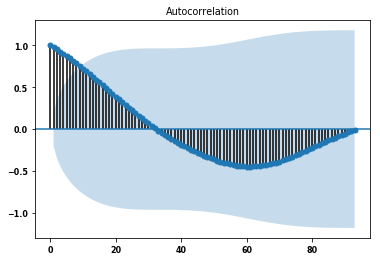

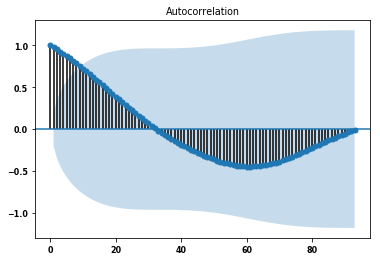

In [14]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(lg_time_df[:-1], alpha=.05)

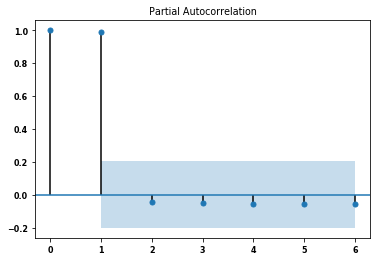

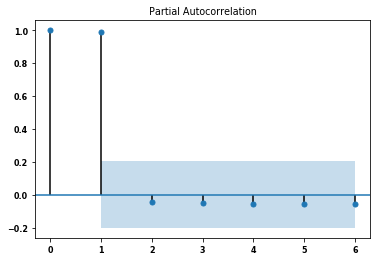

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lg_time_df[:-1], alpha=.05, lags=6)

/Users/dsaphra/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


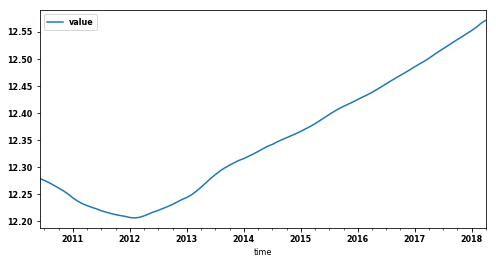

In [16]:
lg_time_df.plot(figsize=size)

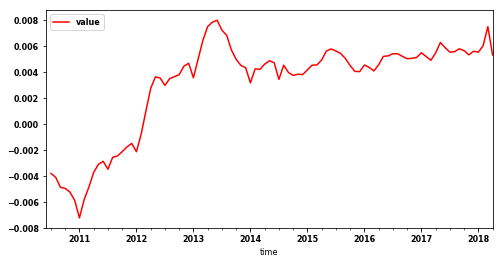

In [17]:
diff = lg_time_df.diff(periods=1)
diff.head()

double_diff = diff.diff(periods=1)
double_diff.dropna(inplace=True)

triple_diff = double_diff.diff(periods=1)
triple_diff.dropna(inplace=True)

#plot the 1st difference
diff.plot(figsize = size, color='r')

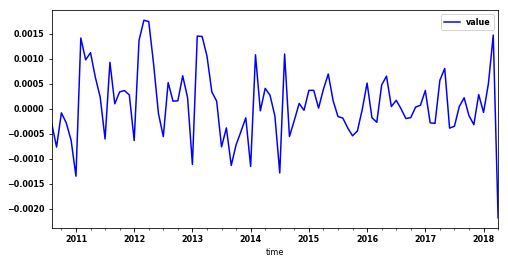

In [18]:
#plot 2nd difference
double_diff.plot(figsize=size, color='b')

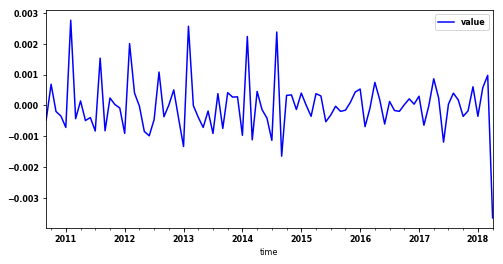

In [19]:
#plot 2nd difference
triple_diff.plot(figsize=size, color='b')

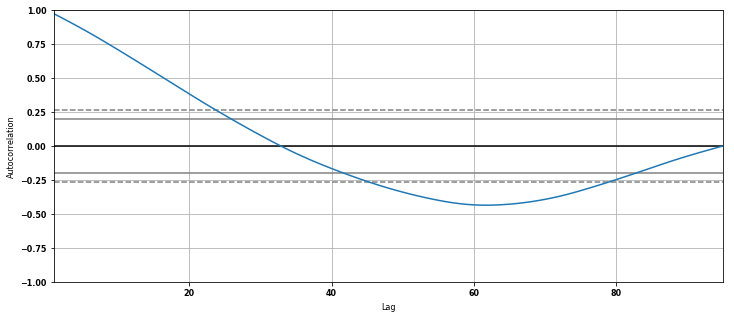

In [20]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(time_df)

In [21]:
#Now we start analyzing with the Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

def show_dfuller_test(df, col, n):
    test = adfuller(df[col][n:-1])
    dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)

In [22]:
show_dfuller_test(diff, 'value', 1)

Test Statistic                 -3.786790
p-value                         0.003045
#Lags Used                     12.000000
Number of Observations Used    80.000000
dtype: float64


In [30]:
show_dfuller_test(double_diff, 'value', 0)

Test Statistic                 -1.344656
p-value                         0.608503
#Lags Used                     12.000000
Number of Observations Used    79.000000
dtype: float64


## Analysis of Dickey Fuller Test:
Taking the diff 2 times managed to get our p-value extremely low, so this is optimal for achieving stationarity

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

In [24]:
def show_ARIMA(df, p, d, q):
    from statsmodels.tsa.arima_model import ARIMA
    #fit ARIMA model (3,1,0))

    model = ARIMA(df[0:-1], order=(p,d,q))
    model_fit = model.fit(disp=2)
    print(model_fit.summary())
    return model_fit

In [29]:
ARIMA_model = show_ARIMA(time_df, 10, 2, 1)

/Users/dsaphra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dsaphra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   92
Model:                ARIMA(10, 2, 1)   Log Likelihood                -574.322
Method:                       css-mle   S.D. of innovations            123.063
Date:                Thu, 05 Sep 2019   AIC                           1174.645
Time:                        14:20:03   BIC                           1207.428
Sample:                    08-01-2010   HQIC                          1187.876
                         - 03-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              32.6265     13.073      2.496      0.015       7.003      58.250
ar.L1.D2.value     -0.1172      0.721     -0.163      0.871      -1.531       1.296
ar.L2.D2.value      0.0621      

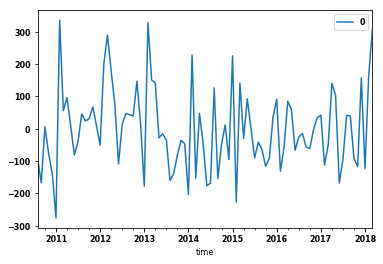

In [31]:
residuals = pd.DataFrame(ARIMA_model.resid)
residuals.plot()
plt.show()

# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.